# CNN Project Version 3.0
## Handwritten Character Recognition with a Convolutional Neural Network

### Jeremy Rico; jjrico@csu.fullerton.edu

This program uses as a Convolutional Artifical Neural Network with one hidden layer to predict the identity of handwritten characters of all 26 letters of the english alphabet.

Dataset: EMNIST Letters - contains 145,600 28x28px images of handwritten characters divided into 26 classes. The dataset is divided into 108,000 training samples, 20,800 validation samples, and 20,800 test samples. More information about the dataset can be found here: https://www.nist.gov/itl/products-and-services/emnist-dataset

This project utilizes the tf.keras module of TensorFlow to create, train, and test the neural network.

TO RUN: We reccommend running this program on a cloud GPU such as Google Colab GPU here: https://colab.research.google.com/notebooks/gpu.ipynb. The EMNIST dataset must be downloaded here https://www.nist.gov/itl/products-and-services/emnist-dataset and then uploaded to Google Colab for the program to run properly. Therefore, the directory in block five may have to be altered to fit your local running environment.

##Data import and manipulation

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy import io as sio
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# define vars
batch_size = 128
layer1_neurons = 256
layer2_neurons = 512
num_classes = 26
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
# drive.mount('/content/drive')
mat_contents = sio.loadmat('/content/emnist-letters.mat')
data = mat_contents['dataset']

# Extract training and test data using given labels
x_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
x_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

# Divide training samples into training and validation
val_start = x_train.shape[0] - x_test.shape[0]
x_val = x_train[val_start:x_train.shape[0],:]
y_val = y_train[val_start:x_train.shape[0]]
x_train = x_train[0:val_start,:]
y_train = y_train[0:val_start]

# Convert class range from 1-27 to 0-26
y_train -= 1
y_val -= 1
y_test -=1

print(x_train.shape)
print(x_val.shape)

(104000, 784)
(20800, 784)


## Reshaping and regularization

In [126]:
# Reshape data from input to ANN
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_train.val[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Regularize Data
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')

x_train shape: (104000, 28, 28, 1)
104000 train samples
20800 validation samples
20800 test samples


## Model Initialization

In [ ]:
# Define Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(layer1_neurons, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(layer2_neurons, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## Compilation and Training

In [128]:
# Compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 104000 samples, validate on 20800 samples
Epoch 1/20
104000/104000 [==============================] - 18s 175us/step - loss: 0.6149 - accuracy: 0.8104 - val_loss: 0.2652 - val_accuracy: 0.9164
Epoch 2/20
104000/104000 [==============================] - 18s 173us/step - loss: 0.2979 - accuracy: 0.9033 - val_loss: 0.2288 - val_accuracy: 0.9251
Epoch 3/20
104000/104000 [==============================] - 18s 173us/step - loss: 0.2404 - accuracy: 0.9201 - val_loss: 0.2119 - val_accuracy: 0.9316
Epoch 4/20
104000/104000 [==============================] - 18s 174us/step - loss: 0.2098 - accuracy: 0.9301 - val_loss: 0.1975 - val_accuracy: 0.9349
Epoch 5/20
104000/104000 [==============================] - 18s 174us/step - loss: 0.1857 - accuracy: 0.9360 - val_loss: 0.2016 - val_accuracy: 0.9351
Epoch 6/20
104000/104000 [==============================] - 18s 173us/step - loss: 0.1658 - accuracy: 0.9422 - val_loss: 0.1992 - val_accuracy: 0.9388
Epoch 7/20
104000/104000 [=================

## Model Testing

In [123]:
# Print final test scores
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4080375210872754
Test accuracy: 0.9340865612030029


## Plots of accuracy and loss for each epoch

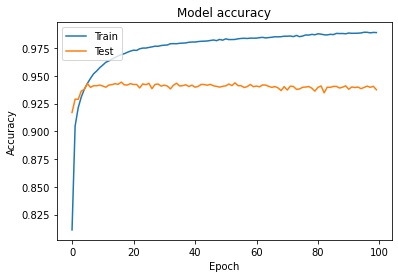

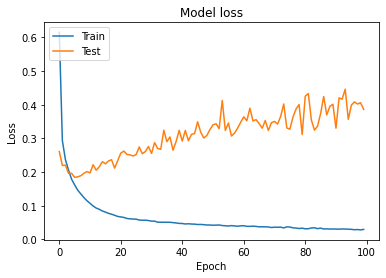

In [124]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Review and Conclusion

1. Modify the code to apply the same convolutional network architecture to the EMNIST Letters dataset. How does the accuracy compare to its peformance on MNIST? How does the accuracy compare to the MLP you trained in Project 2?

A: The mnist_cnn.py file states it was able to obtain an accuracy of 99.25% after 12 epochs. Our model was slightly less efficient. It reached an accuracy of about 93% after 12 epochs. This could be due to the increased size of the emnist dataset. Also We are trying to predict across 26 classes instead of just 10. Our project 1 was only able reach an accuracy of 90.02% with 20 epochs. However, project one ran slightly faster and was less computationaly intense.

2. Now that you have a baseline convolutional network for comparison, begin experimenting with alternative architectures, optimizers, and hyperparameters for the EMNIST Letters dataset. How much can you improve the accuracy over Project 2?

A: Our highest accuracy with project 1 was 90.02% with 20 epochs. We were able to improve that to 99.89% with 100 epochs, 512 neurons in layer 1, and 1024 neurons in layer 2. The CNN was much more time consuming and computationaly intense.

3. Recall that EMNIST Letters merges upper- and lowercase letters into the same class, even when they look very different. How might you design a network that accounts for that difference?

A: EMNIST includes datasets where the upper and lowercase letters are divided. However, since some characters hace the same upper and lowercase shape (C c, K k, O o, etc.), they can be grouped into the same class. Using these datasets we could train a new CNN with 37 output neurons. This would be able to recognize all upper and lowercase characters.

## Test Results

| Epochs | Batch Size | Hidden Layer 1| Hidden Layer 2 | Accuracy | time/epoch |
|--------|------------|---------------|----------------|----------|--------------|
|5       |128         |64             |128             | 93.05%   | 5s           |
|10      |128         |64             |128             | 93.72%   | 5s           |
|15      |128         |64             |128             | 93.62%   | 5s           |
|20      |128         |64             |128             | 93.54%   | 5s           |
|5       |128         |128            |256             | 92.52%   | 7s           |
|10      |128         |128            |256             | 94.41%   | 7s           |
|15      |128         |128            |256             | 95.40%   | 7s           |
|20      |128         |128            |256             | 95.54%   | 7s           |
|5       |128         |256            |512             | 92.52%   | 12s          |
|10      |128         |256            |512             | 94.41%   | 12s          |
|15      |128         |256            |512             | 95.40%   | 12s          |
|20      |128         |256            |512             | 95.54%   | 12s          |
|5       |128         |512            |1024            | 93.84%   | 18s          |
|10      |128         |512            |1024            | 95.76%   | 18s          |
|15      |128         |512            |1024            | 96.75%   | 18s          |
|20      |128         |512            |1024            | 97.18%   | 18s          |
|100     |128         |512            |1024            | 98.90%   | 18s          |